# Convolution and ReLU

Discover how convnets create features with convolutional layers.

## Filter with Convolution

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), # activation is None
    # More layers follow
])

1. Import Library Penting:

    * from tensorflow import keras: Mengimpor library Keras dari TensorFlow.
    * from tensorflow.keras import layers: Mengimpor modul layers dari Keras, yang menyediakan berbagai jenis layer untuk membangun model.

2. Membangun Model Sequential:

    * model = keras.Sequential(): Menginisialisasi model dengan menggunakan kelas Sequential dari Keras. Kelas ini cocok untuk membangun model dengan susunan layer yang berurutan.

3. Menambahkan Layer Konvolusi 2D:

    * layers.Conv2D(filters=64, kernel_size=3): Menambahkan layer konvolusi 2D dengan properti:
        ** filters=64: Menentukan jumlah filter pada layer konvolusi ini, yang mengontrol jumlah peta fitur yang dihasilkan.
        kernel_size=3: Menentukan ukuran kernel (jendela) yang digunakan untuk operasi konvolusi, dalam hal ini 3x3.
    * Catatan: Fungsi aktivasi tidak ditentukan secara eksplisit di sini. Aktivasi default untuk layer konvolusi adalah relu.

In [2]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu')
    # More layers follow
])

layers.Conv2D(filters=64, kernel_size=3, activation='relu'): Menambahkan layer konvolusi 2D dengan properti:

  * filters=64: Menentukan jumlah filter pada layer konvolusi ini, yang mengontrol jumlah peta fitur yang dihasilkan.
  * kernel_size=3: Menentukan ukuran kernel (jendela) yang digunakan untuk operasi konvolusi, dalam hal ini 3x3.
  * activation='relu': Menentukan fungsi aktivasi yang diterapkan setelah operasi konvolusi. Fungsi relu (Rectified Linear Unit) adalah fungsi aktivasi umum yang digunakan pada layer CNN.

## Example - Apply Convolution and ReLU

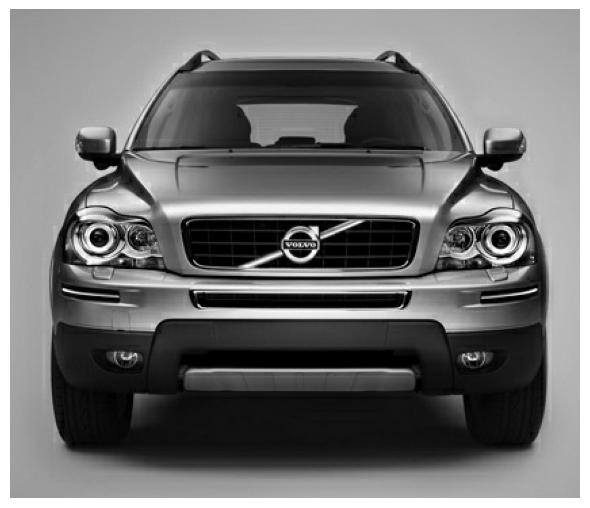

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = './car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

Penjelasan Kode untuk Memuat dan Menampilkan Gambar

Kode yang diberikan berfungsi untuk memuat dan menampilkan gambar menggunakan library TensorFlow dan Matplotlib. Berikut penjelasannya:

1. Impor Library:

    * import tensorflow as tf: Mengimpor library TensorFlow untuk menangani tensor dan membangun graf komputasi.
    * import matplotlib.pyplot as plt: Mengimpor library Matplotlib untuk memvisualisasikan gambar.

2. Konfigurasi Matplotlib:

    * plt.rc('figure', autolayout=True): Mengatur layout gambar agar menyesuaikan secara otomatis dengan konten.
    * plt.rc('axes', ...): Mengkonfigurasi tampilan sumbu dalam plot (ketebalan font, ukuran, pengaturan judul).
    * plt.rc('image', cmap='magma'): Mengatur colormap default untuk visualisasi gambar menjadi "magma" untuk tampilan yang lebih menarik.

3. Memuat Gambar:

    * image_path = './car_feature.jpg': Menentukan path file gambar yang ingin dimuat.
    * image = tf.io.read_file(image_path): Membaca data gambar dari path yang ditentukan menggunakan fungsi I/O file TensorFlow.
    * image = tf.io.decode_jpeg(image): Mendekode data gambar sebagai gambar JPEG menggunakan fungsi decoding gambar TensorFlow.

4. Menampilkan Gambar:

    * plt.figure(figsize=(6, 6)): Membuat figure baru dengan ukuran tertentu (6x6 inci).
    * plt.imshow(tf.squeeze(image), cmap='gray'): Menampilkan gambar menggunakan imshow dari Matplotlib.
        * tf.squeeze(image): Menghilangkan dimensi yang tidak perlu dari tensor gambar.
        * cmap='gray': Menampilkan gambar dalam skala abu-abu.
    * plt.axis('off'): Menyembunyikan label dan tick sumbu untuk tampilan visual yang lebih bersih.
    * plt.show(): Menampilkan plot yang dihasilkan dengan gambar yang dimuat.

In [6]:
import numpy as np
from itertools import product

def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val,
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

1. Import Library:

    * import numpy as np: Mengimpor library NumPy untuk operasi array numerik.
    * from itertools import product: Mengimpor fungsi product dari modul itertools untuk iterasi berpasangan atas elemen baris dan kolom.

2. Definisi Fungsi show_kernel:

    * def show_kernel(kernel, label=True, digits=None, text_size=28):
        * kernel: Kernel yang akan ditampilkan (biasanya berupa array NumPy).
        * label: (Opsional) Boolean yang menentukan apakah akan menampilkan label nilai pada kernel (default: True).
        * digits: (Opsional) Jumlah digit desimal untuk pembulatan nilai (default: None, tidak ada pembulatan).
        * text_size: (Opsional) Ukuran font untuk label nilai (default: 28).

3. Memformat Kernel:

    * kernel = np.array(kernel): Mengubah kernel menjadi array NumPy jika belum dalam format tersebut.
    * kernel = kernel.round(digits): (Opsional) Membulatkan nilai-nilai dalam kernel ke jumlah digit yang ditentukan.

4. Menampilkan Kernel:

    * cmap = plt.get_cmap('Blues_r'): Mendapatkan colormap "Blues_r" dari Matplotlib untuk visualisasi kernel.
    * plt.imshow(kernel, cmap=cmap): Menampilkan kernel sebagai gambar menggunakan imshow dari Matplotlib dengan colormap yang dipilih.

5. Menambahkan Label Nilai (Opsional):

    * if label:: Blok kode ini dijalankan jika argumen label bernilai True.
        * for i, j in product(range(rows), range(cols)): Looping berpasangan melalui indeks baris dan kolom kernel.
            * val = kernel[i, j]: Mengambil nilai elemen pada indeks (i, j) dari kernel.
            * color = cmap(0) if val > thresh else cmap(255): Menentukan warna label berdasarkan nilai elemen:
                * Warna putih jika nilai lebih besar dari nilai ambang tengah (thresh).
                * Warna biru jika nilai lebih kecil atau sama dengan nilai ambang tengah.
            * plt.text(...): Menambahkan label teks pada posisi (j, i) dengan nilai, warna, ukuran font, dan pengaturan perataan.

6. Menyembunyikan Sumbu:

    * plt.xticks([]): Menyembunyikan label sumbu x.
    * plt.yticks([]): Menyembunyikan label sumbu y.

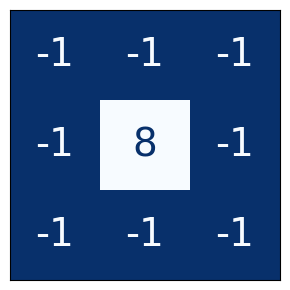

In [7]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)

1. Import Library:

    * import tensorflow as tf: Mengimpor library TensorFlow untuk membuat tensor konstan.

2. Definisi Kernel:

    * kernel = tf.constant([ ... ]): Mendefinisikan kernel sebagai tensor konstan 3x3 menggunakan TensorFlow.

3. Menampilkan Kernel:

    * plt.figure(figsize=(3, 3)): Membuat figure Matplotlib dengan ukuran 3x3 inci.
    * show_kernel(kernel): Memanggil fungsi show_kernel dengan kernel yang telah didefinisikan.
        * Ini akan menampilkan kernel sebagai gambar berwarna dengan nilai-nilai elemennya sebagai label.

Penjelasan Fungsi:

Fungsi show_kernel yang digunakan di sini akan:

  * Memformat kernel menjadi array NumPy.
  * Menampilkan kernel sebagai gambar menggunakan colormap "Blues_r".
  * Menambahkan label nilai pada setiap elemen kernel dengan warna yang disesuaikan (putih untuk nilai positif, biru untuk nilai negatif).
  * Menyembunyikan label dan tick sumbu untuk tampilan yang lebih bersih.

In [8]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

1. Reformasi untuk Kompatibilitas Batch:

    * image = tf.image.convert_image_dtype(image, dtype=tf.float32):
        * Mengubah tipe data gambar menjadi tf.float32. Ini adalah tipe data umum yang digunakan dalam perhitungan TensorFlow, memastikan kompatibilitas dengan berbagai operasi.

    * image = tf.expand_dims(image, axis=0):
        * Menambahkan dimensi baru berukuran 1 pada sumbu ke-0 tensor gambar. Ini membuat dimensi batch, memungkinkan kode untuk menangani beberapa gambar sekaligus.
        * Tensor yang dihasilkan memiliki bentuk (1, tinggi, lebar, channel), di mana dimensi pertama mewakili ukuran batch.

    * kernel = tf.reshape(kernel, [*kernel.shape, 1, 1]):
        * Membentuk ulang tensor kernel untuk menambahkan dua dimensi baru berukuran 1 di akhir.
        * Kernel yang dihasilkan memiliki bentuk (tinggi, lebar, 1, 1). Ini membuat kernel kompatibel untuk melakukan konvolusi pada beberapa channel input (biasanya 3 untuk gambar RGB).

    * kernel = tf.cast(kernel, dtype=tf.float32):
        * Mengubah tipe data kernel menjadi tf.float32, memastikan konsistensi dengan tipe data gambar untuk operasi numerik.

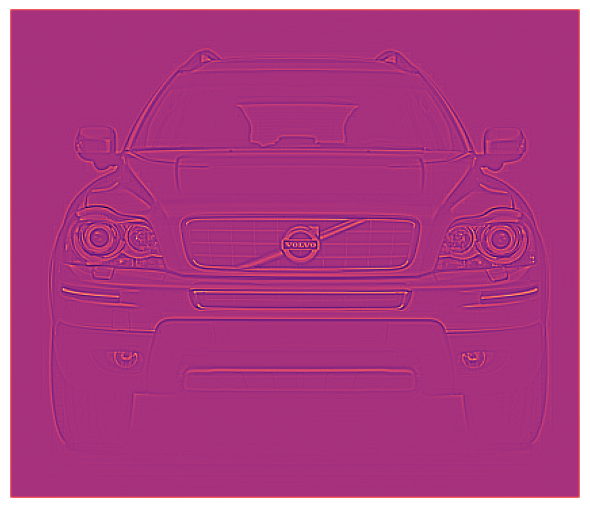

In [9]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

1. Fungsi tf.nn.conv2d:

    * image_filter = tf.nn.conv2d( ... ): Fungsi ini melakukan konvolusi 2D pada tensor gambar (image) menggunakan kernel yang telah didefinisikan sebelumnya (kernel).
        * input: Tensor gambar yang akan dikonvolusi.
        * filters: Tensor kernel yang digunakan untuk operasi konvolusi.
        Argumen yang akan dibahas di lesson 4:
            * strides: Menentukan langkah pergeseran kernel selama konvolusi.
            * padding: Menentukan jenis padding yang digunakan untuk menangani tepi gambar.

2. Menghasilkan Feature Map:

    * Operasi konvolusi menghasilkan feature map, yang merupakan representasi baru dari gambar setelah melalui proses konvolusi dengan kernel.
        * Dimensi feature map biasanya lebih kecil dibandingkan gambar asli karena operasi konvolusi mengurangi ukuran spasial.

3. Menampilkan Feature Map:

    * plt.figure(figsize=(6, 6)): Membuat figure Matplotlib dengan ukuran 6x6 inci.
    * plt.imshow(tf.squeeze(image_filter)): Menampilkan feature map yang dihasilkan sebagai gambar menggunakan imshow dari Matplotlib.
        * tf.squeeze(image_filter): Menghilangkan dimensi batch yang tidak diperlukan jika ukuran batch adalah 1.
    * plt.axis('off'): Menyembunyikan label dan tick sumbu untuk tampilan yang lebih bersih.
    * plt.show(): Menampilkan plot yang dihasilkan dengan feature map.

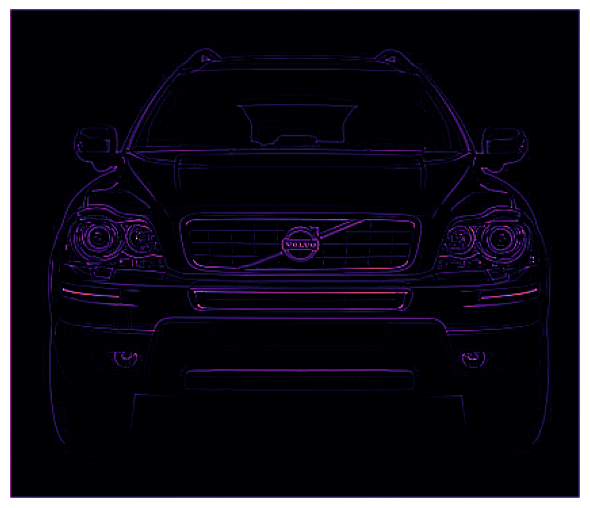

In [10]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

1. Fungsi Aktivasi ReLU:

    * image_detect = tf.nn.relu(image_filter):
        * Fungsi tf.nn.relu menerapkan fungsi aktivasi ReLU secara element-wise pada tensor image_filter, yang berisi feature map yang dihasilkan oleh konvolusi.
        * ReLU adalah fungsi aktivasi umum yang didefinisikan sebagai:
            * f(x) = max(0, x)
            * Ini mengatur nilai negatif menjadi 0 dan mempertahankan nilai positif tidak berubah.

2. Dampak pada Feature Map:

    * ReLU memperkenalkan non-linearitas pada feature map, yang sangat penting untuk mempelajari pola kompleks dalam jaringan saraf dalam.
        * Tanpa non-linearitas, jaringan pada dasarnya akan menjadi fungsi linear, membatasi kemampuannya untuk mempelajari hubungan yang rumit dalam data.

3. Visualisasi:

    * Kode sisanya mirip dengan langkah sebelumnya:
        * plt.figure(figsize=(6, 6)): Membuat figure untuk visualisasi.
        * plt.imshow(tf.squeeze(image_detect)): Menampilkan feature map yang telah diaktifkan sebagai gambar.
        * plt.axis('off'): Menyembunyikan label dan tick sumbu.
        * plt.show(): Menampilkan plot yang dihasilkan.